# Bounds on the Tail of Φ

[Comment on the PM 15 5<sup>th</sup> thread](https://terrytao.wordpress.com/2018/03/02/polymath15-fifth-thread-finishing-off-the-test-problem/#comment-493554) (Terrence Tao,)

"I don’t know if anyone has explicitly computed bounds for the tail of $\Phi$ here, but given the rapid decay, perhaps even very crude bounds would be sufficient, as long as $\mathrm{Im}(u)$ stays a little bit away from $\pm \pi/8$, say $\mathrm{Im}(u) \leq \frac{\pi}{8}-\varepsilon$ so that $e^{4u}$ has some substantial real part in the sense that its argument is between $-\frac{\pi}{4}+4\varepsilon$ and $\frac{\pi}{4} - 4\varepsilon$, so that $|e^{4u}| \leq \mathrm{cosec(4\varepsilon)} \mathrm{Re} e^{4u}$. If for $\theta = 5/4, 9/4$ one lets $C_\theta$ be a constant for which $x^\theta \leq C \exp(x)$ for all ~~C>0~~ $x>0$, then

$$2\pi^2 n^4 |e^{9u}| \leq \mathrm{cosec}(4\varepsilon)^{9/4} 2\pi^2 (\pi/2)^{-9/4} (\pi n^2 \mathrm{Re}(e^{4u})/2)^{9/4} \leq \mathrm{cosec}(4\varepsilon)^{9/4} 2\pi^2 (\pi/2)^{-9/4} C_{9/4} \exp( \pi n^2 \mathrm{Re}(e^{4u})/2)$$

"and similarly for $3\pi n^2 |e^{5u}|$, which should allow one to bound each summand in $\Phi$ by an explicit multiple of $\exp( -\pi n^2 \mathrm{Re} e^{4u} /2)$ in magnitude. One can then control the tail of such a sum $\sum_{n \geq n_0} \exp( -\pi n^2 \mathrm{Re} e^{4u} /2)$ by for instance comparing it with a geometric series (e.g. replacing $n^2$ with $n n_0$). Presumably these sorts of bounds can also then be used to control the tail of $H_t$."

[Also](https://terrytao.wordpress.com/2018/03/02/polymath15-fifth-thread-finishing-off-the-test-problem/#comment-493623)

"Another slightly different way to proceed is just to bound $n^2$ by $n\times n_0$ from the beginning and use the generalised geometric series formulae to evaluate expressions such as $\sum_{n \geq n_0} 2\pi^2 n^4 \exp( - \pi n n_0 \mathrm{Re} e^{4u})$ explicitly."

Following up on the second alternative, below, the initial goal will be to produce code which will explicitly evaluate infinite sums such as 

$$\sum_{n\ge n}n^{2k}e^{-nx} \quad (I)$$

where, in cases of interest, $x=\pi n_0 \Re(e^{4u})$. Since sums of type (I) converge uniformly on compact intervals of $(0, \infty),$<sup>[1]</sup> term by term differentiation of such series is legitimate. 

It is easily shown that $\sum_{n \ge n_0}e^{-nx}= \frac{e^{-n_0x}}{1-e^{-x}}$. The second and fourth derivatives, $k=1,\:2$ in (I) are of interest here. Differentiating symbolically:

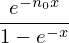

In [1]:
from sympy import *
import math
init_printing(use_unicode=True) # for presentation
x, n0 = symbols('x n0')
f = exp(-x*n0)/(1-exp(-x))
f

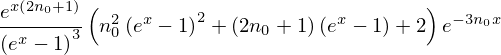

In [2]:
d2f = diff(diff(f,x),x)
simplify(d2f)

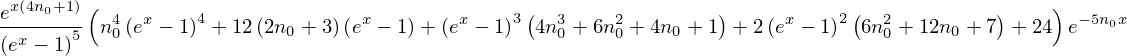

In [3]:
d4f = diff(diff(d2f,x),x)
simplify(d4f)

SymPy expressions may be evaluated by substitution.

In [4]:
d2f.subs(x,2.0).subs(n0,5)

The unicode/LaTeX display option was chosen for human readability. A string which can be easily converted to Python code, or to Julia code with minor modifications, can be obtained using `print_python`. E.g.,

In [5]:
print_python(sympify(d2f))

n0 = Symbol('n0')
x = Symbol('x')
e = n0**2*exp(-n0*x)/(1 - exp(-x)) + 2*n0*exp(-x)*exp(-n0*x)/(1 - exp(-x))**2 + exp(-x)*exp(-n0*x)/(1 - exp(-x))**2 + 2*exp(-2*x)*exp(-n0*x)/(1 - exp(-x))**3


In [6]:
def D2(x,n0):
    return n0**2*exp(-n0*x)/(1 - exp(-x)) + 2*n0*exp(-x)*exp(-n0*x)/(1 - exp(-x))**2 + exp(-x)*exp(-n0*x)/(1 - exp(-x))**2 + 2*exp(-2*x)*exp(-n0*x)/(1 - exp(-x))**3

D2(2.0,5)

Similarly,

In [7]:
print_python(simplify(d4f))

n0 = Symbol('n0')
x = Symbol('x')
e = (n0**4*(exp(x) - 1)**4 + 12*(2*n0 + 3)*(exp(x) - 1) + (exp(x) - 1)**3*(4*n0**3 + 6*n0**2 + 4*n0 + 1) + 2*(exp(x) - 1)**2*(6*n0**2 + 12*n0 + 7) + 24)*exp(-5*n0*x)*exp(x*(4*n0 + 1))/(exp(x) - 1)**5


In [8]:
def D4(x,n0):
    return (n0**4*(exp(x) - 1)**4 + 12*(2*n0 + 3)*(exp(x) - 1) + (exp(x) - 1)**3*(4*n0**3 + 6*n0**2 + 4*n0 + 1) + 2*(exp(x) - 1)**2*(6*n0**2 + 12*n0 + 7) + 24)*exp(-5*n0*x)*exp(x*(4*n0 + 1))/(exp(x) - 1)**5

D4(2.0,5)

In [9]:
d4f.subs(x,2.0).subs(n0,5)

[1] Term by term differentiation is legitimate if both the series and its formal derivative converge uniformly on $[a, b] \subset (0, \infty)$ as per [Wikipedia's](https://en.wikipedia.org/wiki/Uniform_convergence#To_differentiability) citation of Theorem 7.17 of Rudin, Principles of Mathematical Analysis, 3rd ed., McGraw–Hill, 1976. Since partial sums of $e^{-nx}$ and their derivatives can be written as explicit formula and uniformly bounded on $[a,b]$,uniform convergence follows.